<a href="https://colab.research.google.com/github/seunga2590/Machine-Learning/blob/main/Pytorch_cnn_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
col_names = ['seoul', 'code','loc','date','SO2','CO','O3','NO2','PM10','PM25']

df = pd.read_excel('/content/drive/My Drive/Data/data_sum_1.xlsx', names = col_names)
df

,seoul,code,loc,date,SO2,CO,O3,NO2,PM10,PM25
0,서울,111121,중구,2015010102,0.006,0.6,0.022,0.010,57.0,10.0
1,서울,111121,중구,2015010103,0.006,0.6,0.021,0.010,76.0,10.0
2,서울,111121,중구,2015010104,0.006,0.6,0.022,0.009,86.0,11.0
3,서울,111121,중구,2015010105,0.006,0.5,0.021,0.009,106.0,12.0
4,서울,111121,중구,2015010106,0.006,0.6,0.020,0.009,128.0,18.0
...,...,...,...,...,...,...,...,...,...,...
1025850,서울 노원구,111312,노원,2017123120,0.004,0.5,0.014,0.030,27.0,NaN
1025851,서울 노원구,111312,노원,2017123121,0.004,0.5,0.015,0.029,26.0,NaN
1025852,서울 노원구,111312,노원,2017123122,0.005,0.5,0.014,0.027,35.0,NaN
1025853,서울 노원구,111312,노원,2017123123,0.005,0.4,0.017,0.024,36.0,NaN


In [ ]:
df1 = pd.read_excel('/content/drive/My Drive/Data/data_sum_2.xlsx', names = col_names)
df1

,seoul,code,loc,date,SO2,CO,O3,NO2,PM10,PM25
0,서울 중구,111121,중구,2018010102,0.004,0.4,0.024,0.016,27.0,14.0
1,서울 중구,111121,중구,2018010103,0.004,0.4,0.018,0.022,26.0,14.0
2,서울 중구,111121,중구,2018010104,0.004,0.5,0.010,0.030,26.0,15.0
3,서울 중구,111121,중구,2018010105,0.004,0.6,0.011,0.029,28.0,16.0
4,서울 중구,111121,중구,2018010106,0.004,0.5,0.012,0.027,29.0,17.0
...,...,...,...,...,...,...,...,...,...,...
986298,서울 노원구,111312,노원,2020103120,0.003,0.5,0.013,0.051,NaN,NaN
986299,서울 노원구,111312,노원,2020103121,0.003,0.5,0.017,0.040,NaN,NaN
986300,서울 노원구,111312,노원,2020103122,0.003,0.5,0.014,0.043,NaN,NaN
986301,서울 노원구,111312,노원,2020103123,0.003,0.6,0.012,0.045,NaN,NaN


In [ ]:
df_sum = pd.concat([df, df1])
df_sum

,seoul,code,loc,date,SO2,CO,O3,NO2,PM10,PM25
0,서울,111121,중구,2015010102,0.006,0.6,0.022,0.010,57.0,10.0
1,서울,111121,중구,2015010103,0.006,0.6,0.021,0.010,76.0,10.0
2,서울,111121,중구,2015010104,0.006,0.6,0.022,0.009,86.0,11.0
3,서울,111121,중구,2015010105,0.006,0.5,0.021,0.009,106.0,12.0
4,서울,111121,중구,2015010106,0.006,0.6,0.020,0.009,128.0,18.0
...,...,...,...,...,...,...,...,...,...,...
986298,서울 노원구,111312,노원,2020103120,0.003,0.5,0.013,0.051,NaN,NaN
986299,서울 노원구,111312,노원,2020103121,0.003,0.5,0.017,0.040,NaN,NaN
986300,서울 노원구,111312,노원,2020103122,0.003,0.5,0.014,0.043,NaN,NaN
986301,서울 노원구,111312,노원,2020103123,0.003,0.6,0.012,0.045,NaN,NaN


In [ ]:
gang = df_sum['loc'] == '강남'
df_gang = df_sum[gang]
df_gang

,seoul,code,loc,date,SO2,CO,O3,NO2,PM10,PM25
58319,서울,111261,강남,2015010101,0.006,0.2,0.026,0.011,42.0,24.0
58320,서울,111261,강남,2015010102,0.005,0.2,0.025,0.010,54.0,12.0
58321,서울,111261,강남,2015010103,0.005,0.2,0.024,0.010,73.0,19.0
58322,서울,111261,강남,2015010104,0.007,0.2,0.025,0.008,89.0,18.0
58323,서울,111261,강남,2015010105,0.006,0.2,0.025,0.008,106.0,23.0
...,...,...,...,...,...,...,...,...,...,...
978858,서울 강남구,111263,강남,2020103120,0.004,1.0,0.018,0.039,27.0,10.0
978859,서울 강남구,111263,강남,2020103121,0.004,1.0,0.020,0.032,28.0,11.0
978860,서울 강남구,111263,강남,2020103122,0.004,1.0,0.020,0.032,31.0,13.0
978861,서울 강남구,111263,강남,2020103123,0.004,1.0,0.016,0.036,37.0,13.0


In [ ]:
df_gang1 = df_gang.drop(['seoul','code','loc'], axis=1)
df_gang1

,date,SO2,CO,O3,NO2,PM10,PM25
58319,2015010101,0.006,0.2,0.026,0.011,42.0,24.0
58320,2015010102,0.005,0.2,0.025,0.010,54.0,12.0
58321,2015010103,0.005,0.2,0.024,0.010,73.0,19.0
58322,2015010104,0.007,0.2,0.025,0.008,89.0,18.0
58323,2015010105,0.006,0.2,0.025,0.008,106.0,23.0
...,...,...,...,...,...,...,...
978858,2020103120,0.004,1.0,0.018,0.039,27.0,10.0
978859,2020103121,0.004,1.0,0.020,0.032,28.0,11.0
978860,2020103122,0.004,1.0,0.020,0.032,31.0,13.0
978861,2020103123,0.004,1.0,0.016,0.036,37.0,13.0


In [ ]:
df_gang2 = df_gang1.groupby('date').mean()
df_gang3 = df_gang2.reset_index()
df_gang3

,date,SO2,CO,O3,NO2,PM10,PM25
0,2015010101,0.0060,0.45,0.0185,0.0115,40.5,24.0
1,2015010102,0.0055,0.45,0.0180,0.0105,56.5,12.0
2,2015010103,0.0055,0.45,0.0180,0.0085,74.0,19.0
3,2015010104,0.0065,0.45,0.0185,0.0065,89.5,18.0
4,2015010105,0.0060,0.50,0.0185,0.0070,105.5,23.0
...,...,...,...,...,...,...,...
51139,2020103120,0.0035,0.75,0.0240,0.0315,24.5,12.0
51140,2020103121,0.0040,0.70,0.0240,0.0275,25.5,13.0
51141,2020103122,0.0040,0.75,0.0225,0.0285,27.0,14.5
51142,2020103123,0.0035,0.70,0.0225,0.0290,30.5,13.5


In [ ]:
atm = pd.read_excel('/content/drive/My Drive/lab/jung_sum_2.xlsx', index_col=0)
atm

,date,tem,rain,wind_s,wind_d,hum,pre,wind_x,wind_y
0,2015010101,-7.4,NaN,4.7,290.0,33.0,1011.8,2.643416,-3.886174
1,2015010102,-8.0,NaN,4.5,290.0,35.0,1011.7,2.530930,-3.720805
2,2015010103,-8.4,NaN,3.8,290.0,37.0,1012.1,2.137230,-3.142013
3,2015010104,-8.8,NaN,4.9,290.0,35.0,1012.3,2.755902,-4.051544
4,2015010105,-9.1,NaN,5.7,290.0,35.0,1011.8,3.205845,-4.713020
...,...,...,...,...,...,...,...,...,...
51139,2020103120,15.1,NaN,2.8,200.0,59.0,10.1,1.364125,2.445232
51140,2020103121,14.9,NaN,2.7,200.0,58.0,9.7,1.315407,2.357903
51141,2020103122,14.9,NaN,2.6,200.0,57.0,9.6,1.266688,2.270573
51142,2020103123,14.9,NaN,2.0,200.0,54.0,9.1,0.974375,1.746595


In [ ]:
col_names2 = ['date','tem','rain','wind_s','wind_d','hum','pre']
df_atm = pd.read_excel("/content/drive/My Drive/parameter/parameter_sum.xlsx",names = col_names2)
df_atm

,date,tem,rain,wind_s,wind_d,hum,pre
0,2015-01-01 01:00:00,-7.4,NaN,4.7,290.0,33.0,1011.8
1,2015-01-01 02:00:00,-8.0,NaN,4.5,290.0,35.0,1011.7
2,2015-01-01 03:00:00,-8.4,NaN,3.8,290.0,37.0,1012.1
3,2015-01-01 04:00:00,-8.8,NaN,4.9,290.0,35.0,1012.3
4,2015-01-01 05:00:00,-9.1,NaN,5.7,290.0,35.0,1011.8
...,...,...,...,...,...,...,...
52602,2020-12-31 19:00:00,-7.1,NaN,2.4,250.0,58.0,2.1
52603,2020-12-31 20:00:00,-7.1,NaN,3.2,250.0,59.0,2.1
52604,2020-12-31 21:00:00,-7.2,NaN,2.7,250.0,61.0,2.2
52605,2020-12-31 22:00:00,-7.4,NaN,2.5,270.0,66.0,2.3


In [ ]:
df_gang3['tem'] = atm['tem']
df_gang3['rain'] = atm['rain']
df_gang3['hum'] = atm['hum']
df_gang3['pre'] = atm['pre']
df_gang3['wind_x'] = atm['wind_x']
df_gang3['wind_y'] = atm['wind_y']
df_gang3

,date,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y
0,2015010101,0.0060,0.45,0.0185,0.0115,40.5,24.0,-7.4,NaN,33.0,1011.8,2.643416,-3.886174
1,2015010102,0.0055,0.45,0.0180,0.0105,56.5,12.0,-8.0,NaN,35.0,1011.7,2.530930,-3.720805
2,2015010103,0.0055,0.45,0.0180,0.0085,74.0,19.0,-8.4,NaN,37.0,1012.1,2.137230,-3.142013
3,2015010104,0.0065,0.45,0.0185,0.0065,89.5,18.0,-8.8,NaN,35.0,1012.3,2.755902,-4.051544
4,2015010105,0.0060,0.50,0.0185,0.0070,105.5,23.0,-9.1,NaN,35.0,1011.8,3.205845,-4.713020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51139,2020103120,0.0035,0.75,0.0240,0.0315,24.5,12.0,15.1,NaN,59.0,10.1,1.364125,2.445232
51140,2020103121,0.0040,0.70,0.0240,0.0275,25.5,13.0,14.9,NaN,58.0,9.7,1.315407,2.357903
51141,2020103122,0.0040,0.75,0.0225,0.0285,27.0,14.5,14.9,NaN,57.0,9.6,1.266688,2.270573
51142,2020103123,0.0035,0.70,0.0225,0.0290,30.5,13.5,14.9,NaN,54.0,9.1,0.974375,1.746595


In [ ]:
df_gang3['date'] = df_atm['date']

In [ ]:
df_gang3['rain'] = df_gang3['rain'].fillna(0)

In [ ]:
df_final = df_gang3.copy()

In [ ]:
pm10 = df_final['PM10']<400.0
df_fin = df_final.copy()

In [ ]:
a = df_final['PM10']>400
a1 = df_final[a]
df_final[a]

,date,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y
1266,2015-02-22 19:00:00,0.0045,0.30,0.0185,0.0220,522.5,54.0,0.9,0.0,64.0,1007.8,4.035966,0.721788
1267,2015-02-22 20:00:00,0.0040,0.30,0.0175,0.0220,617.5,47.0,0.5,0.0,64.0,1008.3,4.725033,0.845021
1268,2015-02-22 21:00:00,0.0040,0.30,0.0160,0.0235,754.0,64.0,0.2,0.0,66.0,1009.1,2.854708,0.510533
1269,2015-02-22 22:00:00,0.0045,0.30,0.0160,0.0235,841.5,68.0,-0.1,0.0,65.0,1009.4,4.528157,0.809811
1270,2015-02-22 23:00:00,0.0040,0.25,0.0185,0.0195,890.5,82.0,-0.3,0.0,67.0,1010.0,4.035966,0.721788
1271,2015-02-23 00:00:00,0.0040,0.30,0.0190,0.0170,903.5,87.0,-0.7,0.0,68.0,1010.2,3.642213,0.651370
1272,2015-02-23 01:00:00,0.0040,0.30,0.0200,0.0140,884.5,84.0,-1.0,0.0,66.0,1010.3,3.839090,0.686579
1273,2015-02-23 02:00:00,0.0045,0.35,0.0215,0.0110,866.0,86.0,-1.2,0.0,67.0,1010.3,3.642213,0.651370
1274,2015-02-23 03:00:00,0.0040,0.30,0.0225,0.0095,890.0,83.0,-1.5,0.0,69.0,1009.8,0.843643,-1.240268
1275,2015-02-23 04:00:00,0.0035,0.35,0.0215,0.0105,907.0,78.0,-1.9,0.0,67.0,1009.6,2.067202,0.369696


In [ ]:
df_fin1 = df_final.drop(a1.index, axis=0)
df_fin1

,date,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y
0,2015-01-01 01:00:00,0.0060,0.45,0.0185,0.0115,40.5,24.0,-7.4,0.0,33.0,1011.8,2.643416,-3.886174
1,2015-01-01 02:00:00,0.0055,0.45,0.0180,0.0105,56.5,12.0,-8.0,0.0,35.0,1011.7,2.530930,-3.720805
2,2015-01-01 03:00:00,0.0055,0.45,0.0180,0.0085,74.0,19.0,-8.4,0.0,37.0,1012.1,2.137230,-3.142013
3,2015-01-01 04:00:00,0.0065,0.45,0.0185,0.0065,89.5,18.0,-8.8,0.0,35.0,1012.3,2.755902,-4.051544
4,2015-01-01 05:00:00,0.0060,0.50,0.0185,0.0070,105.5,23.0,-9.1,0.0,35.0,1011.8,3.205845,-4.713020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51139,2020-10-31 20:00:00,0.0035,0.75,0.0240,0.0315,24.5,12.0,15.1,0.0,59.0,10.1,1.364125,2.445232
51140,2020-10-31 21:00:00,0.0040,0.70,0.0240,0.0275,25.5,13.0,14.9,0.0,58.0,9.7,1.315407,2.357903
51141,2020-10-31 22:00:00,0.0040,0.75,0.0225,0.0285,27.0,14.5,14.9,0.0,57.0,9.6,1.266688,2.270573
51142,2020-10-31 23:00:00,0.0035,0.70,0.0225,0.0290,30.5,13.5,14.9,0.0,54.0,9.1,0.974375,1.746595


In [ ]:
df_fin2 = df_fin1.set_index('date')
df_fin2

,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y
date,,,,,,,,,,,,
2015-01-01 01:00:00,0.0060,0.45,0.0185,0.0115,40.5,24.0,-7.4,0.0,33.0,1011.8,2.643416,-3.886174
2015-01-01 02:00:00,0.0055,0.45,0.0180,0.0105,56.5,12.0,-8.0,0.0,35.0,1011.7,2.530930,-3.720805
2015-01-01 03:00:00,0.0055,0.45,0.0180,0.0085,74.0,19.0,-8.4,0.0,37.0,1012.1,2.137230,-3.142013
2015-01-01 04:00:00,0.0065,0.45,0.0185,0.0065,89.5,18.0,-8.8,0.0,35.0,1012.3,2.755902,-4.051544
2015-01-01 05:00:00,0.0060,0.50,0.0185,0.0070,105.5,23.0,-9.1,0.0,35.0,1011.8,3.205845,-4.713020
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31 20:00:00,0.0035,0.75,0.0240,0.0315,24.5,12.0,15.1,0.0,59.0,10.1,1.364125,2.445232
2020-10-31 21:00:00,0.0040,0.70,0.0240,0.0275,25.5,13.0,14.9,0.0,58.0,9.7,1.315407,2.357903
2020-10-31 22:00:00,0.0040,0.75,0.0225,0.0285,27.0,14.5,14.9,0.0,57.0,9.6,1.266688,2.270573


In [ ]:
from datetime import datetime

date = pd.to_datetime(df_fin2.index, format='%Y-%m-%d, %H:%M:%S')
date

DatetimeIndex(['2015-01-01 01:00:00', '2015-01-01 02:00:00',
               '2015-01-01 03:00:00', '2015-01-01 04:00:00',
               '2015-01-01 05:00:00', '2015-01-01 06:00:00',
               '2015-01-01 07:00:00', '2015-01-01 08:00:00',
               '2015-01-01 09:00:00', '2015-01-01 10:00:00',
               ...
               '2020-10-31 15:00:00', '2020-10-31 16:00:00',
               '2020-10-31 17:00:00', '2020-10-31 18:00:00',
               '2020-10-31 19:00:00', '2020-10-31 20:00:00',
               '2020-10-31 21:00:00', '2020-10-31 22:00:00',
               '2020-10-31 23:00:00', '2020-11-01 00:00:00'],
              dtype='datetime64[ns]', name='date', length=51119, freq=None)

In [ ]:
df_fin2['date'] = date

In [ ]:
df_2015 = df_fin2[:8740]
df_2015

,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y,date
date,,,,,,,,,,,,,
2015-01-01 01:00:00,0.0060,0.45,0.0185,0.0115,40.5,24.0,-7.4,0.0,33.0,1011.8,2.643416,-3.886174,2015-01-01 01:00:00
2015-01-01 02:00:00,0.0055,0.45,0.0180,0.0105,56.5,12.0,-8.0,0.0,35.0,1011.7,2.530930,-3.720805,2015-01-01 02:00:00
2015-01-01 03:00:00,0.0055,0.45,0.0180,0.0085,74.0,19.0,-8.4,0.0,37.0,1012.1,2.137230,-3.142013,2015-01-01 03:00:00
2015-01-01 04:00:00,0.0065,0.45,0.0185,0.0065,89.5,18.0,-8.8,0.0,35.0,1012.3,2.755902,-4.051544,2015-01-01 04:00:00
2015-01-01 05:00:00,0.0060,0.50,0.0185,0.0070,105.5,23.0,-9.1,0.0,35.0,1011.8,3.205845,-4.713020,2015-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 20:00:00,0.0070,1.00,0.0030,0.0625,95.5,64.0,-0.1,0.0,81.0,1022.0,0.771973,0.209900,2015-12-31 20:00:00
2015-12-31 21:00:00,0.0070,0.95,0.0025,0.0610,100.5,78.0,-0.7,0.0,84.0,1022.4,1.157959,0.314850,2015-12-31 21:00:00
2015-12-31 22:00:00,0.0070,1.05,0.0020,0.0645,106.0,69.0,-1.3,0.0,83.0,1022.4,1.061463,0.288612,2015-12-31 22:00:00


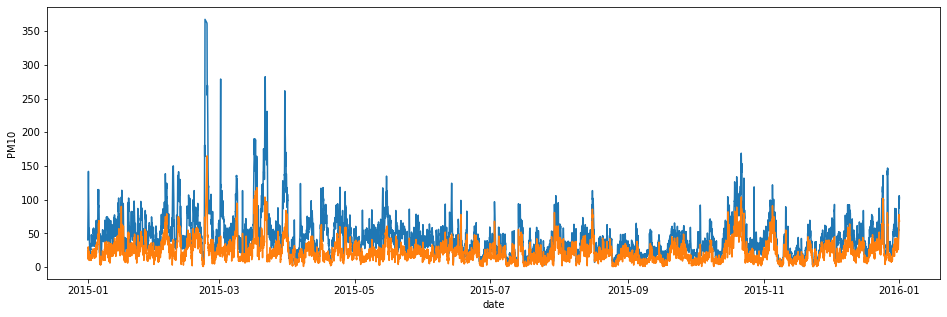

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,5))
sns.lineplot(y=df_2015['PM10'], x=df_2015['date'])
sns.lineplot(y=df_2015['PM25'], x=df_2015['date'])
plt.xlabel('date')
plt.ylabel('PM10')
plt.show()

In [ ]:
df_fin3 = df_fin2.interpolate(method='values')
df_fin3

,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y,date
date,,,,,,,,,,,,,
2015-01-01 01:00:00,0.0060,0.45,0.0185,0.0115,40.5,24.0,-7.4,0.0,33.0,1011.8,2.643416,-3.886174,2015-01-01 01:00:00
2015-01-01 02:00:00,0.0055,0.45,0.0180,0.0105,56.5,12.0,-8.0,0.0,35.0,1011.7,2.530930,-3.720805,2015-01-01 02:00:00
2015-01-01 03:00:00,0.0055,0.45,0.0180,0.0085,74.0,19.0,-8.4,0.0,37.0,1012.1,2.137230,-3.142013,2015-01-01 03:00:00
2015-01-01 04:00:00,0.0065,0.45,0.0185,0.0065,89.5,18.0,-8.8,0.0,35.0,1012.3,2.755902,-4.051544,2015-01-01 04:00:00
2015-01-01 05:00:00,0.0060,0.50,0.0185,0.0070,105.5,23.0,-9.1,0.0,35.0,1011.8,3.205845,-4.713020,2015-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31 20:00:00,0.0035,0.75,0.0240,0.0315,24.5,12.0,15.1,0.0,59.0,10.1,1.364125,2.445232,2020-10-31 20:00:00
2020-10-31 21:00:00,0.0040,0.70,0.0240,0.0275,25.5,13.0,14.9,0.0,58.0,9.7,1.315407,2.357903,2020-10-31 21:00:00
2020-10-31 22:00:00,0.0040,0.75,0.0225,0.0285,27.0,14.5,14.9,0.0,57.0,9.6,1.266688,2.270573,2020-10-31 22:00:00


In [ ]:
df_fin4 = df_fin3.dropna(how='any')
df_fin4

,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y,date
date,,,,,,,,,,,,,
2015-01-01 01:00:00,0.0060,0.45,0.0185,0.0115,40.5,24.0,-7.4,0.0,33.0,1011.8,2.643416,-3.886174,2015-01-01 01:00:00
2015-01-01 02:00:00,0.0055,0.45,0.0180,0.0105,56.5,12.0,-8.0,0.0,35.0,1011.7,2.530930,-3.720805,2015-01-01 02:00:00
2015-01-01 03:00:00,0.0055,0.45,0.0180,0.0085,74.0,19.0,-8.4,0.0,37.0,1012.1,2.137230,-3.142013,2015-01-01 03:00:00
2015-01-01 04:00:00,0.0065,0.45,0.0185,0.0065,89.5,18.0,-8.8,0.0,35.0,1012.3,2.755902,-4.051544,2015-01-01 04:00:00
2015-01-01 05:00:00,0.0060,0.50,0.0185,0.0070,105.5,23.0,-9.1,0.0,35.0,1011.8,3.205845,-4.713020,2015-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31 20:00:00,0.0035,0.75,0.0240,0.0315,24.5,12.0,15.1,0.0,59.0,10.1,1.364125,2.445232,2020-10-31 20:00:00
2020-10-31 21:00:00,0.0040,0.70,0.0240,0.0275,25.5,13.0,14.9,0.0,58.0,9.7,1.315407,2.357903,2020-10-31 21:00:00
2020-10-31 22:00:00,0.0040,0.75,0.0225,0.0285,27.0,14.5,14.9,0.0,57.0,9.6,1.266688,2.270573,2020-10-31 22:00:00


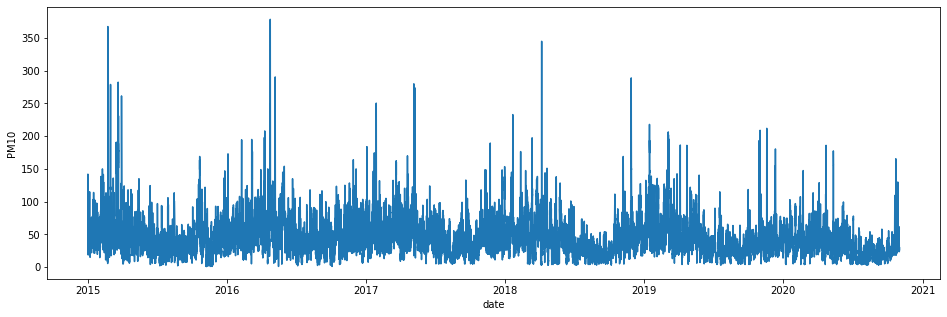

In [ ]:
plt.figure(figsize=(16,5))
sns.lineplot(y=df_fin4['PM10'], x=df_fin4['date'])
plt.xlabel('date')
plt.ylabel('PM10')
plt.show()

In [ ]:
df_new = df_fin4.copy()
df_new

,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y,date
date,,,,,,,,,,,,,
2015-01-01 01:00:00,0.0060,0.45,0.0185,0.0115,40.5,24.0,-7.4,0.0,33.0,1011.8,2.643416,-3.886174,2015-01-01 01:00:00
2015-01-01 02:00:00,0.0055,0.45,0.0180,0.0105,56.5,12.0,-8.0,0.0,35.0,1011.7,2.530930,-3.720805,2015-01-01 02:00:00
2015-01-01 03:00:00,0.0055,0.45,0.0180,0.0085,74.0,19.0,-8.4,0.0,37.0,1012.1,2.137230,-3.142013,2015-01-01 03:00:00
2015-01-01 04:00:00,0.0065,0.45,0.0185,0.0065,89.5,18.0,-8.8,0.0,35.0,1012.3,2.755902,-4.051544,2015-01-01 04:00:00
2015-01-01 05:00:00,0.0060,0.50,0.0185,0.0070,105.5,23.0,-9.1,0.0,35.0,1011.8,3.205845,-4.713020,2015-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31 20:00:00,0.0035,0.75,0.0240,0.0315,24.5,12.0,15.1,0.0,59.0,10.1,1.364125,2.445232,2020-10-31 20:00:00
2020-10-31 21:00:00,0.0040,0.70,0.0240,0.0275,25.5,13.0,14.9,0.0,58.0,9.7,1.315407,2.357903,2020-10-31 21:00:00
2020-10-31 22:00:00,0.0040,0.75,0.0225,0.0285,27.0,14.5,14.9,0.0,57.0,9.6,1.266688,2.270573,2020-10-31 22:00:00


In [ ]:
new = df_fin2.drop('date', axis=1)
new

,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y
date,,,,,,,,,,,,
2015-01-01 01:00:00,0.0060,0.45,0.0185,0.0115,40.5,24.0,-7.4,0.0,33.0,1011.8,2.643416,-3.886174
2015-01-01 02:00:00,0.0055,0.45,0.0180,0.0105,56.5,12.0,-8.0,0.0,35.0,1011.7,2.530930,-3.720805
2015-01-01 03:00:00,0.0055,0.45,0.0180,0.0085,74.0,19.0,-8.4,0.0,37.0,1012.1,2.137230,-3.142013
2015-01-01 04:00:00,0.0065,0.45,0.0185,0.0065,89.5,18.0,-8.8,0.0,35.0,1012.3,2.755902,-4.051544
2015-01-01 05:00:00,0.0060,0.50,0.0185,0.0070,105.5,23.0,-9.1,0.0,35.0,1011.8,3.205845,-4.713020
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31 20:00:00,0.0035,0.75,0.0240,0.0315,24.5,12.0,15.1,0.0,59.0,10.1,1.364125,2.445232
2020-10-31 21:00:00,0.0040,0.70,0.0240,0.0275,25.5,13.0,14.9,0.0,58.0,9.7,1.315407,2.357903
2020-10-31 22:00:00,0.0040,0.75,0.0225,0.0285,27.0,14.5,14.9,0.0,57.0,9.6,1.266688,2.270573


In [ ]:
new1 = new.interpolate(method='values')
new1

,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y
date,,,,,,,,,,,,
2015-01-01 01:00:00,0.0060,0.45,0.0185,0.0115,40.5,24.0,-7.4,0.0,33.0,1011.8,2.643416,-3.886174
2015-01-01 02:00:00,0.0055,0.45,0.0180,0.0105,56.5,12.0,-8.0,0.0,35.0,1011.7,2.530930,-3.720805
2015-01-01 03:00:00,0.0055,0.45,0.0180,0.0085,74.0,19.0,-8.4,0.0,37.0,1012.1,2.137230,-3.142013
2015-01-01 04:00:00,0.0065,0.45,0.0185,0.0065,89.5,18.0,-8.8,0.0,35.0,1012.3,2.755902,-4.051544
2015-01-01 05:00:00,0.0060,0.50,0.0185,0.0070,105.5,23.0,-9.1,0.0,35.0,1011.8,3.205845,-4.713020
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31 20:00:00,0.0035,0.75,0.0240,0.0315,24.5,12.0,15.1,0.0,59.0,10.1,1.364125,2.445232
2020-10-31 21:00:00,0.0040,0.70,0.0240,0.0275,25.5,13.0,14.9,0.0,58.0,9.7,1.315407,2.357903
2020-10-31 22:00:00,0.0040,0.75,0.0225,0.0285,27.0,14.5,14.9,0.0,57.0,9.6,1.266688,2.270573


In [ ]:
new2 = new1.dropna(how='any')
new2

,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y
date,,,,,,,,,,,,
2015-01-01 01:00:00,0.0060,0.45,0.0185,0.0115,40.5,24.0,-7.4,0.0,33.0,1011.8,2.643416,-3.886174
2015-01-01 02:00:00,0.0055,0.45,0.0180,0.0105,56.5,12.0,-8.0,0.0,35.0,1011.7,2.530930,-3.720805
2015-01-01 03:00:00,0.0055,0.45,0.0180,0.0085,74.0,19.0,-8.4,0.0,37.0,1012.1,2.137230,-3.142013
2015-01-01 04:00:00,0.0065,0.45,0.0185,0.0065,89.5,18.0,-8.8,0.0,35.0,1012.3,2.755902,-4.051544
2015-01-01 05:00:00,0.0060,0.50,0.0185,0.0070,105.5,23.0,-9.1,0.0,35.0,1011.8,3.205845,-4.713020
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31 20:00:00,0.0035,0.75,0.0240,0.0315,24.5,12.0,15.1,0.0,59.0,10.1,1.364125,2.445232
2020-10-31 21:00:00,0.0040,0.70,0.0240,0.0275,25.5,13.0,14.9,0.0,58.0,9.7,1.315407,2.357903
2020-10-31 22:00:00,0.0040,0.75,0.0225,0.0285,27.0,14.5,14.9,0.0,57.0,9.6,1.266688,2.270573


In [ ]:
new3 = new2.reset_index()

In [ ]:
pm = new3['PM10']
pm1 = pm[24:]
pm10 = pm1.reset_index()

In [ ]:
new3['pm10_tomm'] = pm10['PM10']
new3

,date,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y,pm10_tomm
0,2015-01-01 01:00:00,0.0060,0.45,0.0185,0.0115,40.5,24.0,-7.4,0.0,33.0,1011.8,2.643416,-3.886174,21.0
1,2015-01-01 02:00:00,0.0055,0.45,0.0180,0.0105,56.5,12.0,-8.0,0.0,35.0,1011.7,2.530930,-3.720805,23.0
2,2015-01-01 03:00:00,0.0055,0.45,0.0180,0.0085,74.0,19.0,-8.4,0.0,37.0,1012.1,2.137230,-3.142013,25.5
3,2015-01-01 04:00:00,0.0065,0.45,0.0185,0.0065,89.5,18.0,-8.8,0.0,35.0,1012.3,2.755902,-4.051544,18.5
4,2015-01-01 05:00:00,0.0060,0.50,0.0185,0.0070,105.5,23.0,-9.1,0.0,35.0,1011.8,3.205845,-4.713020,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51114,2020-10-31 20:00:00,0.0035,0.75,0.0240,0.0315,24.5,12.0,15.1,0.0,59.0,10.1,1.364125,2.445232,NaN
51115,2020-10-31 21:00:00,0.0040,0.70,0.0240,0.0275,25.5,13.0,14.9,0.0,58.0,9.7,1.315407,2.357903,NaN
51116,2020-10-31 22:00:00,0.0040,0.75,0.0225,0.0285,27.0,14.5,14.9,0.0,57.0,9.6,1.266688,2.270573,NaN
51117,2020-10-31 23:00:00,0.0035,0.70,0.0225,0.0290,30.5,13.5,14.9,0.0,54.0,9.1,0.974375,1.746595,NaN


In [ ]:
prac = new3.copy()

In [ ]:
pd.to_datetime(prac['date'])

0       2015-01-01 01:00:00
1       2015-01-01 02:00:00
2       2015-01-01 03:00:00
3       2015-01-01 04:00:00
4       2015-01-01 05:00:00
                ...        
51114   2020-10-31 20:00:00
51115   2020-10-31 21:00:00
51116   2020-10-31 22:00:00
51117   2020-10-31 23:00:00
51118   2020-11-01 00:00:00
Name: date, Length: 51119, dtype: datetime64[ns]

In [ ]:
prac['dayofweek'] = prac['date'].dt.dayofweek

In [ ]:
prac.head()

,date,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y,pm10_tomm,dayofweek
0,2015-01-01 01:00:00,0.0060,0.45,0.0185,0.0115,40.5,24.0,-7.4,0.0,33.0,1011.8,2.643416,-3.886174,21.0,3
1,2015-01-01 02:00:00,0.0055,0.45,0.0180,0.0105,56.5,12.0,-8.0,0.0,35.0,1011.7,2.530930,-3.720805,23.0,3
2,2015-01-01 03:00:00,0.0055,0.45,0.0180,0.0085,74.0,19.0,-8.4,0.0,37.0,1012.1,2.137230,-3.142013,25.5,3
3,2015-01-01 04:00:00,0.0065,0.45,0.0185,0.0065,89.5,18.0,-8.8,0.0,35.0,1012.3,2.755902,-4.051544,18.5,3
4,2015-01-01 05:00:00,0.0060,0.50,0.0185,0.0070,105.5,23.0,-9.1,0.0,35.0,1011.8,3.205845,-4.713020,22.5,3


In [ ]:
hour = prac['date'].astype(str).str[11:13]
prac['hour'] = hour

In [ ]:
mon = prac['dayofweek'] == 0
monday = prac[mon]
monday.head()

,date,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y,pm10_tomm,dayofweek,hour
95,2015-01-05 00:00:00,0.0055,1.05,0.0025,0.0540,58.0,28.0,0.3,0.0,89.0,1008.9,2.605408,0.708412,92.0,0,00
96,2015-01-05 01:00:00,0.0045,1.00,0.0020,0.0500,56.5,27.0,-0.3,0.0,92.0,1009.0,2.315918,0.629700,89.5,0,01
97,2015-01-05 02:00:00,0.0055,1.00,0.0025,0.0465,52.0,37.0,-0.5,0.0,95.0,1010.0,0.693740,-1.552007,91.5,0,02
98,2015-01-05 03:00:00,0.0050,1.05,0.0020,0.0445,48.5,36.0,-0.7,0.0,95.0,1010.5,2.219422,0.603462,71.0,0,03
99,2015-01-05 04:00:00,0.0050,0.85,0.0020,0.0360,48.5,31.0,-0.9,0.0,95.0,1010.7,1.061013,-2.373658,58.5,0,04


In [ ]:
monday = monday.groupby('hour').mean()

In [ ]:
tue = prac['dayofweek'] == 1
tuesday = prac[tue]
wed = prac['dayofweek'] == 2
wednesday = prac[wed]
thu = prac['dayofweek'] == 3
thursday = prac[thu]
fri = prac['dayofweek'] == 4
friday = prac[fri]
sat = prac['dayofweek'] == 5
saturday = prac[sat]
sun = prac['dayofweek'] == 6
sunday = prac[sun]

In [ ]:
tuesday = tuesday.groupby('hour').mean()

In [ ]:
wednesday = wednesday.groupby('hour').mean()
thursday = thursday.groupby('hour').mean()
friday = friday.groupby('hour').mean()
saturday = saturday.groupby('hour').mean()
sunday = sunday.groupby('hour').mean()

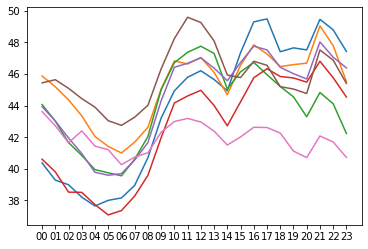

In [ ]:
plt.plot(monday['PM10'])
plt.plot(tuesday['PM10'])
plt.plot(wednesday['PM10'])
plt.plot(thursday['PM10'])
plt.plot(friday['PM10'])
plt.plot(saturday['PM10'])
plt.plot(sunday['PM10'])
plt.show()

In [ ]:
new4 = new3.dropna(how='any')

In [ ]:
grade = []
for each in new4['PM10']:
  if each <=30:
    grade.append(0)
  elif each <=80:
    grade.append(1)
  elif each <=150:
    grade.append(2)
  else:
    grade.append(3)

In [ ]:
grade_pm_tomm = grade[1:]
grade_pm_tomm.append(np.nan)
new4['grade_pm_tomm'] = grade_pm_tomm
new5 = new4.dropna(how='any')
new6 = new5.set_index('date')
new7 = new6.drop('pm10_tomm', axis=1)
new7.to_excel('/content/drive/My Drive/Data/final_data.xlsx')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
pm = new7['PM10']
pm1 = pm[1:]
pm10 = pm1.reset_index()
pm10

,date,PM10
0,2015-01-01 02:00:00,56.5
1,2015-01-01 03:00:00,74.0
2,2015-01-01 04:00:00,89.5
3,2015-01-01 05:00:00,105.5
4,2015-01-01 06:00:00,127.0
...,...,...
51088,2020-10-30 19:00:00,35.5
51089,2020-10-30 20:00:00,50.5
51090,2020-10-30 21:00:00,61.0
51091,2020-10-30 22:00:00,60.5


In [ ]:
new_pm = new7.reset_index()
new_pm['value_pm_tomm'] = pm10['PM10']

In [ ]:
new_pm.head()

,date,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y,grade_pm_tomm,value_pm_tomm
0,2015-01-01 01:00:00,0.0060,0.45,0.0185,0.0115,40.5,24.0,-7.4,0.0,33.0,1011.8,2.643416,-3.886174,1.0,56.5
1,2015-01-01 02:00:00,0.0055,0.45,0.0180,0.0105,56.5,12.0,-8.0,0.0,35.0,1011.7,2.530930,-3.720805,1.0,74.0
2,2015-01-01 03:00:00,0.0055,0.45,0.0180,0.0085,74.0,19.0,-8.4,0.0,37.0,1012.1,2.137230,-3.142013,2.0,89.5
3,2015-01-01 04:00:00,0.0065,0.45,0.0185,0.0065,89.5,18.0,-8.8,0.0,35.0,1012.3,2.755902,-4.051544,2.0,105.5
4,2015-01-01 05:00:00,0.0060,0.50,0.0185,0.0070,105.5,23.0,-9.1,0.0,35.0,1011.8,3.205845,-4.713020,2.0,127.0


In [ ]:
new_pm.to_excel('/content/drive/My Drive/Data/final_data.xlsx')

In [ ]:
cnn_data = new_pm.copy()

In [ ]:
bad = cnn_data['PM10'] > 80
bad_data = cnn_data[bad]

In [ ]:
X = new7[['SO2',	'CO',	'O3',	'NO2',	'PM10',	'PM25',	'tem'	,'rain',	'hum',	'pre',	'wind_x',	'wind_y']]
y = new7['grade_pm_tomm']

In [ ]:
x_train = X[:26283]
x_val = X[26283:43803]
x_test = X[43803:]
y_train = y[:26283]
y_val = y[26283:43803]
y_test = y[43803:]

In [ ]:
x_train_np = np.array(x_train)
x_val_np = np.array(x_val)
x_test_np = np.array(x_test)
y_train_np = np.array(y_train)
y_val_np = np.array(y_val)
y_test_np = np.array(y_test)

In [ ]:
batch_size= 5

In [ ]:
N = BUFFER_SIZE = len(y_train_np)
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.batch(batch_size)
train_dataset = train_dataset.repeat()
train_dataset

<RepeatDataset shapes: ((None, 12), (None,)), types: (tf.float64, tf.float64)>

In [ ]:
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = val_dataset.batch(batch_size)
val_dataset = val_dataset.repeat()

In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.batch(batch_size)

In [ ]:
new_pm.head()

,date,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y,grade_pm_tomm,value_pm_tomm
0,2015-01-01 01:00:00,0.0060,0.45,0.0185,0.0115,40.5,24.0,-7.4,0.0,33.0,1011.8,2.643416,-3.886174,1.0,56.5
1,2015-01-01 02:00:00,0.0055,0.45,0.0180,0.0105,56.5,12.0,-8.0,0.0,35.0,1011.7,2.530930,-3.720805,1.0,74.0
2,2015-01-01 03:00:00,0.0055,0.45,0.0180,0.0085,74.0,19.0,-8.4,0.0,37.0,1012.1,2.137230,-3.142013,2.0,89.5
3,2015-01-01 04:00:00,0.0065,0.45,0.0185,0.0065,89.5,18.0,-8.8,0.0,35.0,1012.3,2.755902,-4.051544,2.0,105.5
4,2015-01-01 05:00:00,0.0060,0.50,0.0185,0.0070,105.5,23.0,-9.1,0.0,35.0,1011.8,3.205845,-4.713020,2.0,127.0


In [ ]:
new_pm1 = new_pm.drop(['grade_pm_tomm'], axis=1)
new_pm1 = new_pm1.dropna(how='any')
new_pm2 = new_pm1.drop('value_pm_tomm', axis=1)
new_pm2.head()

,date,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y
0,2015-01-01 01:00:00,0.0060,0.45,0.0185,0.0115,40.5,24.0,-7.4,0.0,33.0,1011.8,2.643416,-3.886174
1,2015-01-01 02:00:00,0.0055,0.45,0.0180,0.0105,56.5,12.0,-8.0,0.0,35.0,1011.7,2.530930,-3.720805
2,2015-01-01 03:00:00,0.0055,0.45,0.0180,0.0085,74.0,19.0,-8.4,0.0,37.0,1012.1,2.137230,-3.142013
3,2015-01-01 04:00:00,0.0065,0.45,0.0185,0.0065,89.5,18.0,-8.8,0.0,35.0,1012.3,2.755902,-4.051544
4,2015-01-01 05:00:00,0.0060,0.50,0.0185,0.0070,105.5,23.0,-9.1,0.0,35.0,1011.8,3.205845,-4.713020


In [ ]:
lstm_train = pd.read_excel('/content/drive/My Drive/Data/lstm-train.xlsx')
lstm_val = pd.read_excel('/content/drive/My Drive/Data/lstm-val.xlsx')
lstm_test = pd.read_excel('/content/drive/My Drive/Data/lstm-test.xlsx')

In [ ]:
lstm_train.shape, lstm_val.shape, lstm_test.shape

((26187, 2), (17424, 2), (7194, 2))

In [ ]:
train = new_pm2[:26283]
val = new_pm2[26283:43803]
test = new_pm2[43803:]

In [ ]:
train = train.set_index('date')
val = val.set_index('date')
test = test.set_index('date')

In [ ]:
mean = train.mean()
std = train.std()

train_scaled = (train - mean) / std
val_scaled = (val-mean) / std
test_scaled = (test-mean) / std

train_scaled = train_scaled.reset_index()
val_scaled = val_scaled.reset_index()
test_scaled = test_scaled.reset_index()

In [ ]:
value_tomm_pm = new_pm1['value_pm_tomm']
train_y = value_tomm_pm[:26283]
train_y = train_y.reset_index()
val_y = value_tomm_pm[26283:43803]
val_y = val_y.reset_index()
test_y = value_tomm_pm[43803:]
test_y = test_y.reset_index()

In [ ]:
train_scaled['value_tomm'] = train_y['value_pm_tomm']
val_scaled['value_tomm'] = val_y['value_pm_tomm']
test_scaled['value_tomm'] = test_y['value_pm_tomm']

In [ ]:
train_shuffled = train_scaled.iloc[np.random.permutation(train_scaled.index)].reset_index(drop=True)
train_shuffled.head()

,date,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y,value_tomm
0,2016-01-06 10:00:00,1.028899,1.114708,-0.892176,1.275820,-0.128461,-0.068114,-1.329929,-0.105216,-0.600796,-0.724215,-1.103671,-0.767217,58.0
1,2016-11-06 10:00:00,-1.143950,-1.111515,-0.321292,-0.712132,-1.010914,-1.093509,0.078177,-0.105216,-0.348279,-0.711840,0.808907,-1.587506,18.0
2,2015-11-20 16:00:00,-0.057525,-0.443648,-0.004134,-0.028773,-0.491824,-0.791922,-0.011511,-0.105216,-0.095763,1.431277,0.523770,0.580462,41.5
3,2016-02-07 04:00:00,-0.419667,0.892086,-0.543302,-0.059835,0.511750,-0.128432,-1.805276,-0.105216,-0.398783,-0.725708,0.149387,0.416387,53.5
4,2016-02-15 08:00:00,-0.781809,0.001597,0.122729,-0.650008,-0.630248,-0.731605,-2.083310,-0.105216,-0.550293,-0.726775,1.235412,-1.430459,23.0


In [ ]:
train_set = train_scaled[24:-72].reset_index()
val_set = val_scaled[24:-72].reset_index()
test_set = test_scaled[24:-72].reset_index()
train_set.shape, val_set.shape, test_set.shape

((26187, 15), (17424, 15), (7194, 15))

In [ ]:
train_set = train_set.drop('index', axis=1)
val_set = val_set.drop('index', axis=1)
test_set = test_set.drop('index', axis=1)

In [ ]:
train_set['lstm'] = lstm_train[0]
val_set['lstm'] = lstm_val[0]
test_set['lstm'] = lstm_test[0]

In [ ]:
train_set.head()

,date,SO2,CO,O3,NO2,PM10,PM25,tem,rain,hum,pre,wind_x,wind_y,value_tomm,lstm
0,2015-01-02 01:00:00,-0.057525,0.001597,-0.353008,-1.271243,-0.941702,-0.550653,-1.975684,-0.105216,-0.095763,1.435117,-0.158316,-0.326819,23.0,0.223680
1,2015-01-02 02:00:00,-0.057525,0.001597,-0.194429,-1.519737,-0.872490,-0.671288,-1.966715,-0.105216,-0.146266,1.434690,0.395780,0.238273,25.5,0.308155
2,2015-01-02 03:00:00,-0.419667,-0.221026,-0.130997,-1.706108,-0.785975,-0.791922,-1.975684,-0.105216,-0.095763,1.434904,-0.410406,0.968033,18.5,0.477901
3,2015-01-02 04:00:00,0.304616,-0.221026,-0.162713,-1.581861,-1.028217,-0.852240,-1.966715,-0.105216,0.005244,1.433197,-0.339094,1.233691,22.5,0.706761
4,2015-01-02 05:00:00,0.304616,-0.221026,-0.384723,-1.333367,-0.889793,-0.852240,-1.957747,-0.105216,0.005244,1.433197,0.337522,0.228636,26.5,0.814296


In [ ]:
train_x = train_set[['SO2',	'CO',	'O3',	'NO2',	'PM10',	'PM25',	'tem',	'rain',	'hum',	'pre',	'wind_x',	'wind_y','lstm']]
train_y = train_set[['value_tomm']]
valid_x = val_set[['SO2',	'CO',	'O3',	'NO2',	'PM10',	'PM25',	'tem',	'rain',	'hum',	'pre',	'wind_x',	'wind_y','lstm']]
valid_y = val_set[['value_tomm']]
test_x = test_set[['SO2',	'CO',	'O3',	'NO2',	'PM10',	'PM25',	'tem',	'rain',	'hum',	'pre',	'wind_x',	'wind_y','lstm']]
test_y = test_set[['value_tomm']]

In [ ]:
def multivariate_data(dataset, target, start_index, history_size, 
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i , step)
    data.append(dataset.iloc[indices])

    if single_step:
      labels.append(target.iloc[i+target_size])
    else:
      labels.append(target.iloc[i:i+target_size])

  return np.array(data), np.array(labels)

In [ ]:
history_size = 72
step = 1
target_size = 24

train_x, train_y = multivariate_data(train_x, train_y, 0, history_size, target_size, step, single_step=True)
valid_x, valid_y = multivariate_data(valid_x, valid_y, 0, history_size, target_size, step, single_step=True)
test_x, test_y = multivariate_data(test_x, test_y, 0, history_size, target_size, step, single_step=True)

In [ ]:
train_x.shape, train_y.shape, valid_x.shape, valid_y.shape, test_x.shape, test_y.shape

((26091, 72, 13),
 (26091, 1),
 (17328, 72, 13),
 (17328, 1),
 (7098, 72, 13),
 (7098, 1))

In [ ]:
#train_x = train_x.reshape(26091,1,72,13)
#valid_x = valid_x.reshape(17328,1,72,13)

In [ ]:
def make_tf_dataset(x, y, batch_size, shuffle_buffer, shuffle=True):
  ds = tf.data.Dataset.from_tensor_slices((x, y))
  if shuffle:
    ds = ds.cache().shuffle(shuffle_buffer).batch(batch_size).repeat()
  else:
    ds = ds.cache().batch(batch_size).repeat()

  return ds

In [ ]:
batch_size = 64

train_data  = make_tf_dataset(train_x, train_y, batch_size, 1000, False)
valid_data = make_tf_dataset(valid_x, valid_y, batch_size, 1000, False)
test_data = make_tf_dataset(test_x, test_y, batch_size, 1000, False)

In [ ]:
import math

train_step = math.ceil(train_x.shape[0] / batch_size)
valid_step = math.ceil(valid_x.shape[0] / batch_size)
test_step = math.ceil(test_x.shape[0])

In [ ]:
import torch
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
from torch import nn, optim

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [ ]:
class make_model(nn.Module):
    def __init__(self, n_features, n_hidden, seq_len, n_layers):
        super(make_model, self).__init__()
        self.n_hidden = n_hidden
        self.seq_len = seq_len
        self.n_layers = n_layers
        self.c1 = nn.Conv1d(in_channels=13, out_channels=1, kernel_size = 24, stride = 1, padding='same', padding_mode='zeros') # 1D CNN 레이어 추가
        self.lstm = nn.LSTM(
            input_size=n_features,
            hidden_size=n_hidden,
            num_layers=n_layers
        ) # input_size = 13, hidde_size = 72, n_layers = 2
        self.linear = nn.Linear(in_features=n_hidden, out_features=13)
    def reset_hidden_state(self):
        self.hidden = (
            torch.zeros(self.n_layers, self.seq_len-1, self.n_hidden),
            torch.zeros(self.n_layers, self.seq_len-1, self.n_hidden)
        )
    def forward(self, sequences):
        sequences = self.c1(sequences.view(len(sequences), 1, -1))
        lstm_out, self.hidden = self.lstm(
            sequences.view(len(sequences), self.seq_len-1, -1),
            self.hidden
        )
        last_time_step = lstm_out.view(self.seq_len-1, len(sequences), self.n_hidden)[-1]
        y_pred = self.linear(last_time_step)
        return y_pred

In [ ]:
def train_model(model, train_data, train_labels, val_data=None, val_labels=None, num_epochs=100, verbose = 10, patience = 10):
    loss_fn = torch.nn.L1Loss() #
    optimiser = torch.optim.Adam(model.parameters(), lr=0.001)
    train_hist = []
    val_hist = []
    for t in range(num_epochs):

        epoch_loss = 0

        for idx, seq in enumerate(train_data): # sample 별 hidden state reset을 해줘야 함 

            model.reset_hidden_state()

            # train loss
            seq = torch.unsqueeze(seq, 0)
            y_pred = model(seq)
            loss = loss_fn(y_pred[0].float(), train_labels[idx]) # 1개의 step에 대한 loss

            # update weights
            optimiser.zero_grad()
            loss.backward()
            optimiser.step()

            epoch_loss += loss.item()

        train_hist.append(epoch_loss / len(train_data))

        if val_data is not None:

            with torch.no_grad():

                val_loss = 0

                for val_idx, val_seq in enumerate(val_data):

                    model.reset_hidden_state() #seq 별로 hidden state 초기화 

                    val_seq = torch.unsqueeze(val_seq, 0)
                    y_val_pred = model(val_seq)
                    val_step_loss = loss_fn(y_val_pred[0].float(), val_labels[val_idx])

                    val_loss += val_step_loss
                
            val_hist.append(val_loss / len(val_data)) # val hist에 추가

            ## verbose 번째 마다 loss 출력 
            if t % verbose == 0:
                print(f'Epoch {t} train loss: {epoch_loss / len(train_data)} val loss: {val_loss / len(val_data)}')

            ## patience 번째 마다 early stopping 여부 확인
            if (t % patience == 0) & (t != 0):
                
                ## loss가 커졌다면 early stop
                if val_hist[t - patience] < val_hist[t] :

                    print('\n Early Stopping')

                    break

        elif t % verbose == 0:
            print(f'Epoch {t} train loss: {epoch_loss / len(train_data)}')

            
    return model, train_hist, val_hist

In [ ]:
def make_Tensor(array):
    return torch.from_numpy(array).float()

In [ ]:
train_x = make_Tensor(train_x)
train_y = make_Tensor(train_y)
valid_x = make_Tensor(valid_x)
valid_y = make_Tensor(valid_y)
test_x = make_Tensor(test_x)
test_y = make_Tensor(test_y)

TypeError: ignored

In [ ]:
train_x.shape

In [ ]:
model = make_model(
    n_features=13,
    n_hidden=72,
    seq_len=24,
    n_layers=1
)

In [ ]:
print(model)

make_model(
  (c1): Conv1d(13, 1, kernel_size=(24,), stride=(1,), padding=same)
  (lstm): LSTM(13, 72)
  (linear): Linear(in_features=72, out_features=13, bias=True)
)


In [ ]:
model, train_hist, val_hist = train_model(
    model,
    train_x,
    train_y,
    valid_x,
    valid_y,
    num_epochs=100,
    verbose=10,
    patience=50
)

RuntimeError: ignored